# Exploring Stock Market Data

This notebook provides step-by-step instructions for replicating what Brian did in the third demo, to analyze Apple's stock closing prices between October 24, 2024 and October 23, 2025. 

Please follow along, and feel free to play with different variations too! 

## Step 1: Define the Dates and Ticker Variables

These variables will be used at the end to generate a summary of the insights.

In [1]:
start_date = '2024-10-24'
end_date = '2025-10-23'
ticker = 'AAPL'

## Step 2: Download Apple Stock Data

- Open Jupyter chat by clicking on the chat bubble icon on the left sidebar of Jupyter Lab
- Create a new chat by clicking `+Chat` (choose any name for the file)
- In the chat window, attach the Markdown file `yfinance_docs.md` using the `@` symbol
  - Type `@`, then select `file` from the autocomplete menu
  - You'll see a list of available files in the lesson's directory, choose `yfinance_docs.md` 
- To download Apple stock data, use a prompt like this:
   > Use yfinance to download Apple (AAPL) stock data for this period:
   > - start date: October 24, 2024
   > - end date: October 23, 2025
   >
   > Save the returned results in a DataFrame called `aapl`
- Transfer the generated code to the cell below and run it

In [2]:
# download Apple stock data
import yfinance as yf

# Download Apple stock data for the specified period
aapl = yf.download('AAPL', start='2024-10-24', end='2025-10-23')

/var/folders/3c/z265h0p14_g3_cx3s8ycd15m0000gn/T/ipykernel_67365/1641461080.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL', start='2024-10-24', end='2025-10-23')


[*********************100%***********************]  1 of 1 completed

<span style="color:green; font-weight:bold;">Note:</span> If you see a message saying that cached data was used due to rate limit errors, this is a temporary issue in this learning environment that occurs when too many requests are sent simultaneously. You can run the notebook locally if you wish to download data for different stocks.

- Print the columns of the DataFrame `aapl`: `aapl.columns`

In [3]:
aapl.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

- In the chat window, ask how you can flatten the columns of the DataFrame using a prompt like this:
  > The DataFrame aapl has multiIndexed columns [('Close','AAPL'),('High','AAPL'),('Low','AAPL'),('Open','AAPL'),('Volume','AAPL')]. Flatten the columns by removing 'AAPL'.

In [4]:
# flatten the columns 
aapl.columns = aapl.columns.get_level_values(0)

In [5]:
aapl.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

## Step 3: Calculate Basic Statistics & Metrics

- In the same chat window, use a prompt like this to calculate the basic descriptive statistics of the DataFrame:
  > Display the shape and statistical summary of the DataFrame aapl.

In [6]:
# Display the shape and statistical summary of the DataFrame aapl.
print(f"Shape: {aapl.shape}")
print("\nStatistical Summary:")
aapl.describe()

Shape: (249, 5)

Statistical Summary:


Price,Close,High,Low,Open,Volume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,224.957396,227.273416,222.369992,224.635081,5.421537e+07
std,18.868477,18.431105,19.040953,18.838291,2.333789e+07
min,171.998993,189.875235,168.796839,171.530131,2.323470e+07
25%,209.771927,211.721759,207.484525,209.692012,4.012770e+07
50%,227.094116,229.300003,224.690002,226.366414,4.722760e+07
75%,238.742477,241.320007,236.370897,238.970001,5.736570e+07
max,262.769989,265.290009,261.829987,262.649994,1.843959e+08


- To calculate the total return, use a prompt like this:
  > Use the Close column of DataFrame aapl to find the total return in percentage (`total_return`) based on the start price and end price.

In [7]:
# calculate the total return
start_price = aapl['Close'].iloc[0]
end_price = aapl['Close'].iloc[-1]
total_return = ((end_price - start_price) / start_price) * 100

print(f"Start Price: ${start_price:.2f}")
print(f"End Price: ${end_price:.2f}")
print(f"Total Return: {total_return:.2f}%")

Start Price: $229.50
End Price: $258.45
Total Return: 12.61%


## Step 4: Visualize the Closing Price

- To visualize Apple's Closing price, use a prompt like this:
  > Create a line chart showing the closing price trend using the column 'Close' of the DataFrame `aapl`.
  >
  > Use matplotlib to create a professional-looking chart with:
  > - Clear title and axis labels
  > - Grid for readability
  > - Appropriate colors and styling

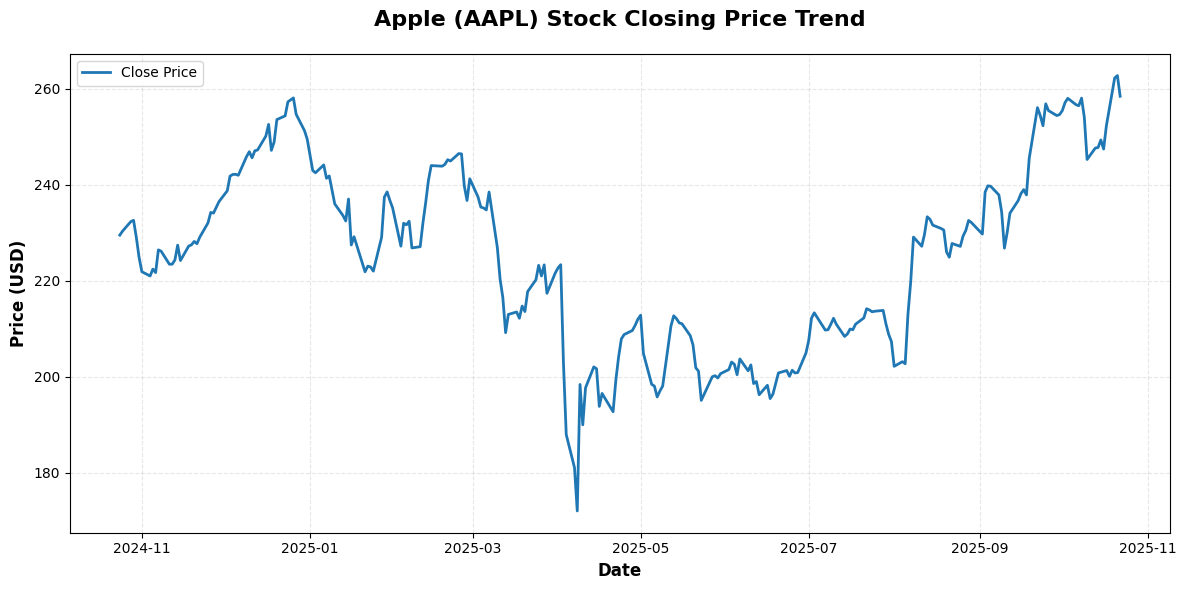

In [8]:
# Create a line chart showing the closing price trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Close'], linewidth=2, color='#1f77b4', label='Close Price')

plt.title('Apple (AAPL) Stock Closing Price Trend', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=12, fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

- To find the dates that correspond to the peak and lowest prices, use a prompt like this:
  > Use the Close column of aapl dataFrame to find and print:
  > - the peak date (in a variable called `peak_date`) that corresponds to the maximum closing price `peak_price`
  > - the lowest date (in a variable called `lowest_date`) that corresponds to the minimum closing price `lowest_price`
  >
  > Update the above code to show the peak and low prices in the line chart.

Peak Date: 2025-10-21
Peak Price: $262.77

Lowest Date: 2025-04-08
Lowest Price: $172.00


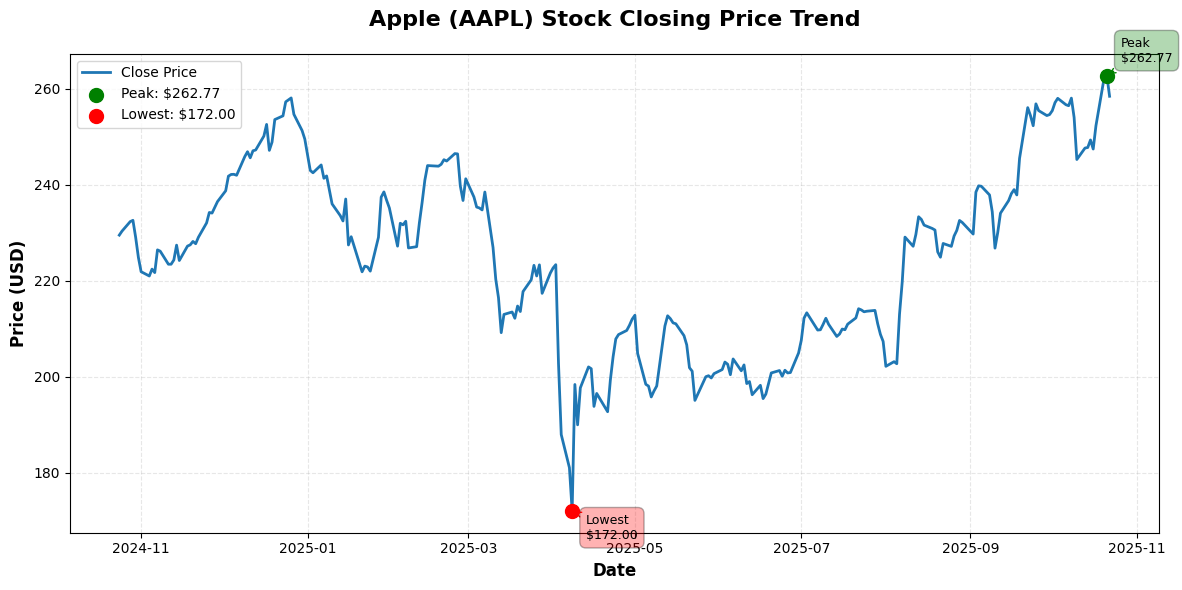

In [9]:
# find the dates that correspond to the peak and lowest prices
peak_date = aapl['Close'].idxmax()
peak_price = float(aapl['Close'].max())

lowest_date = aapl['Close'].idxmin()
lowest_price = float(aapl['Close'].min())

print(f"Peak Date: {peak_date.strftime('%Y-%m-%d')}")
print(f"Peak Price: ${peak_price:.2f}")
print(f"\nLowest Date: {lowest_date.strftime('%Y-%m-%d')}")
print(f"Lowest Price: ${lowest_price:.2f}")

# Update the chart to show peak and low prices
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Close'], linewidth=2, color='#1f77b4', label='Close Price')

# Mark peak and lowest points
plt.scatter([peak_date], [peak_price], color='green', s=100, zorder=5, label=f'Peak: ${peak_price:.2f}')
plt.scatter([lowest_date], [lowest_price], color='red', s=100, zorder=5, label=f'Lowest: ${lowest_price:.2f}')

# Add annotations
plt.annotate(f'Peak\n${peak_price:.2f}', 
             xy=(peak_date, peak_price), 
             xytext=(10, 10), 
             textcoords='offset points',
             fontsize=9,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='green', alpha=0.3),
             arrowprops=dict(arrowstyle='->', color='green'))

plt.annotate(f'Lowest\n${lowest_price:.2f}', 
             xy=(lowest_date, lowest_price), 
             xytext=(10, -20), 
             textcoords='offset points',
             fontsize=9,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.3),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Apple (AAPL) Stock Closing Price Trend', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=12, fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

- To find the context related to the peak and lowest date, use a prompt like this:
  > For the `peak_date` and `lowest_date`, search for related Apple news using Serper. The Serper API key is saved in a .env file. Store the snippets of the found articles in a json string `news_snippets` that has these fields: peak_date, lowest_date, peak_news_snippets, lowest_news_snippets.

<span style="color:green; font-weight:bold;">Note:</span> The `SERPER_API_KEY` variable is already defined in this environment, you do not need to create  an `.env` file. 

In [10]:
# To find the context related to the peak and lowest date
import os
import requests
import json
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
serper_api_key = os.getenv('SERPER_API_KEY')

def search_news(query, api_key):
    """Search for news using SerpApi"""
    if not api_key:
        print("Warning: SERPER_API_KEY not found in environment variables")
        return []
    
    url = "https://serpapi.com/search"
    params = {
        'q': query,
        'api_key': api_key,
        'num': 3
    }
    
    try:
        response = requests.get(url, params=params, timeout=10)
        if response.status_code == 200:
            results = response.json()
            snippets = []
            if 'organic_results' in results:
                for item in results['organic_results'][:3]:  # Get top 3 results
                    snippets.append({
                        'title': item.get('title', ''),
                        'snippet': item.get('snippet', '')
                    })
            return snippets
        else:
            print(f"API returned status code: {response.status_code}")
            if response.status_code == 403:
                print("This may indicate an invalid API key or insufficient permissions")
            return []
    except Exception as e:
        print(f"Error searching news: {str(e)}")
        return []

# Search for news on peak date
peak_query = f"Apple AAPL stock news {peak_date.strftime('%Y-%m-%d')}"
print(f"Searching for: {peak_query}")
peak_news = search_news(peak_query, serper_api_key)

# Search for news on lowest date
lowest_query = f"Apple AAPL stock news {lowest_date.strftime('%Y-%m-%d')}"
print(f"Searching for: {lowest_query}")
lowest_news = search_news(lowest_query, serper_api_key)

# Store snippets in JSON string
news_snippets = json.dumps({
    'peak_date': peak_date.strftime('%Y-%m-%d'),
    'lowest_date': lowest_date.strftime('%Y-%m-%d'),
    'peak_news_snippets': peak_news,
    'lowest_news_snippets': lowest_news
}, indent=2)

print(f"\n{'='*60}")
print(f"News snippets for Peak Date ({peak_date.strftime('%Y-%m-%d')}):")
print(f"{'='*60}")
if peak_news:
    for item in peak_news:
        print(f"\n• {item['title']}")
        print(f"  {item['snippet']}")
else:
    print("No news found or API key not configured")

print(f"\n{'='*60}")
print(f"News snippets for Lowest Date ({lowest_date.strftime('%Y-%m-%d')}):")
print(f"{'='*60}")
if lowest_news:
    for item in lowest_news:
        print(f"\n• {item['title']}")
        print(f"  {item['snippet']}")
else:
    print("No news found or API key not configured")

Searching for: Apple AAPL stock news 2025-10-21


Searching for: Apple AAPL stock news 2025-04-08



News snippets for Peak Date (2025-10-21):

• Apple Inc. (AAPL) Stock Historical Prices & Data
  Discover historical prices for AAPL stock on Yahoo Finance. View daily, weekly or monthly format back to when Apple Inc. stock was issued.

• Stock Price
  NASDAQ: AAPL ; October 21, 2025, $262.77 ; October 20, 2025, $262.24 ; October 17, 2025, $252.29 ; October 16, 2025, $247.45.

• Wall Street bullishness pushes Apple to cusp of $4 trillion ...
  Wall Street gets back on the Apple train, pushing stock to cusp of $4 trillion market cap. Published Tue, Oct 21 20259:25 AM EDT. thumbnail.

News snippets for Lowest Date (2025-04-08):

• AAPL: Apple Inc - Stock Price, Quote and News
  Apple's iPhone 17 Boosts Stock Amid Record Sales November 8, 2025 TipRanks · Warner Bros. Discovery Stock (NASDAQ:WBD) Gains as Comcast Steps In November 7, 2025 ...

• Apple's Historic Selloff Has Bulls Balking From Tariff Risks
  Despite the uncertainty, many analysts remain positive on Apple's prospects, expect

## Step 5: Analyze Volatility

- To calculate the signal's volatility, use a prompt like this: 
  >In the DataFrame aapl, find the overall volatility in percentage using the column Close. Volatility is the standard deviation of the daily percentage changes. Save the result in a variable called `volatility`.

In [11]:
# calculate the signal's volatility
# Calculate daily percentage changes
daily_returns = aapl['Close'].pct_change()

# Calculate volatility as standard deviation of daily percentage changes
volatility = daily_returns.std() * 100  # Convert to percentage

print(f"Overall Volatility: {volatility:.2f}%")

Overall Volatility: 2.07%


- To find and plot the rolling volatility, use a prompt like this:
  > Calculate the rolling volatility as the as 20-day standard deviation of the daily percentage change and plot it. Identify days of high volatility where volatility is greater than mean + std. Save the days of high volatility in a DataFrame called `high_vol_days`.

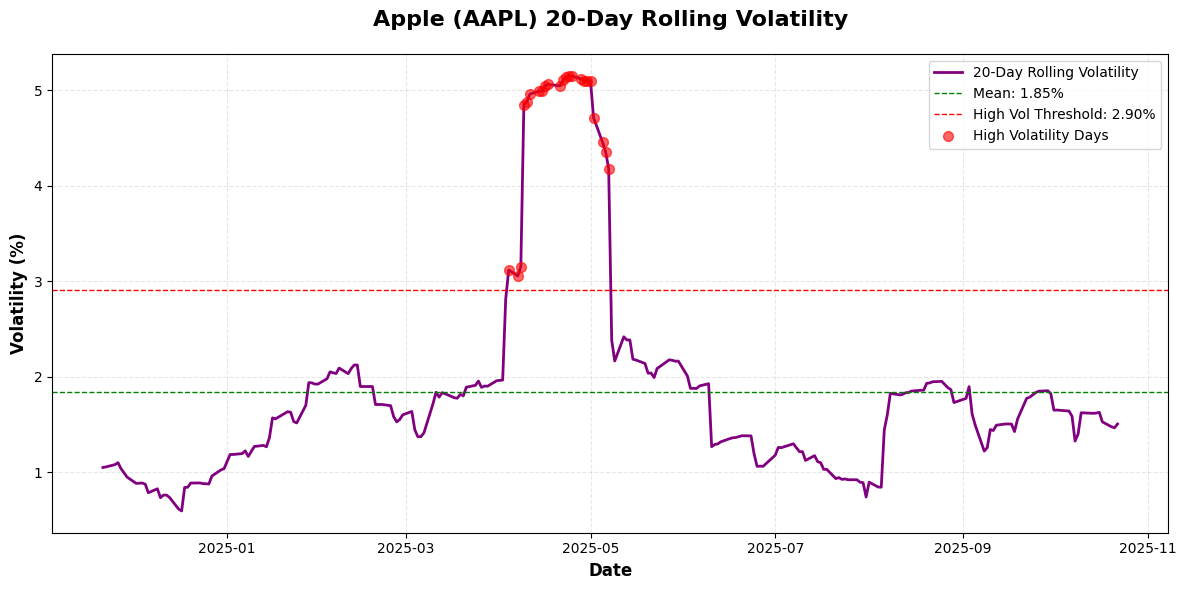


High Volatility Statistics:
Mean Rolling Volatility: 1.85%
Std Dev of Rolling Volatility: 1.06%
High Volatility Threshold: 2.90%
Number of High Volatility Days: 23

High Volatility Days:
Price            Close  Rolling_Volatility
Date                                      
2025-04-24  207.861206            5.153517
2025-04-25  208.768982            5.147652
2025-04-23  204.100433            5.133824
2025-04-28  209.626892            5.116591
2025-04-22  199.252289            5.109178
2025-05-01  212.799133            5.098374
2025-04-30  211.981125            5.098022
2025-04-29  210.694275            5.097095
2025-04-17  196.499023            5.061487
2025-04-16  193.795639            5.045888
2025-04-21  192.688339            5.045341
2025-04-14  202.025497            4.989270
2025-04-15  201.646423            4.988150
2025-04-11  197.666153            4.959483
2025-04-10  189.955048            4.881460
2025-04-09  198.364456            4.848774
2025-05-02  204.848587            4.71

In [12]:
# Calculate daily percentage changes
daily_pct_change = aapl['Close'].pct_change()

# Calculate 20-day rolling volatility (standard deviation)
rolling_volatility = daily_pct_change.rolling(window=20).std() * 100  # Convert to percentage

# Calculate mean and standard deviation of rolling volatility
mean_vol = rolling_volatility.mean()
std_vol = rolling_volatility.std()

# Identify high volatility days (volatility > mean + std)
threshold = mean_vol + std_vol
high_vol_mask = rolling_volatility > threshold
high_vol_days = aapl[high_vol_mask].copy()
high_vol_days['Rolling_Volatility'] = rolling_volatility[high_vol_mask]

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, rolling_volatility, linewidth=2, color='purple', label='20-Day Rolling Volatility')

# Add horizontal lines for mean and threshold
plt.axhline(y=mean_vol, color='green', linestyle='--', linewidth=1, label=f'Mean: {mean_vol:.2f}%')
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1, label=f'High Vol Threshold: {threshold:.2f}%')

# Mark high volatility days
plt.scatter(high_vol_days.index, rolling_volatility[high_vol_mask], 
           color='red', s=50, zorder=5, alpha=0.6, label='High Volatility Days')

plt.title('Apple (AAPL) 20-Day Rolling Volatility', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Volatility (%)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

print(f"\nHigh Volatility Statistics:")
print(f"Mean Rolling Volatility: {mean_vol:.2f}%")
print(f"Std Dev of Rolling Volatility: {std_vol:.2f}%")
print(f"High Volatility Threshold: {threshold:.2f}%")
print(f"Number of High Volatility Days: {len(high_vol_days)}")
print(f"\nHigh Volatility Days:")
print(high_vol_days[['Close', 'Rolling_Volatility']].sort_values('Rolling_Volatility', ascending=False))

## Step 6: Report Generation

- To generate a report summarizing the insights, use a prompt like this:
  
  > Use gpt-4.1-mini to generate a summary that takes in these variables:
  > - ticker: stock ticker (string)
  > - start_date: analysis starting period (string)
  > - end_date: analysis end period (string)
  > - numerical metrics: total_return & volatility (in percentage)
  > - peak_date, peak_price
  > - lowest_date, lowest_price
  > - high_vol_days: pandas DataFrame showing high volatility days
  > - news_snippets: string containing snippet of news for the peak and lowest dates
  >
  > The OpenAI API key is stored in the .env file. The variables are already defined in the notebook.

In [13]:
# generate a report summarizing the insights
from openai import OpenAI
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')

# Initialize OpenAI client
client = OpenAI(api_key=openai_api_key)

# Prepare the context for the summary
high_vol_summary = high_vol_days[['Close', 'Rolling_Volatility']].sort_values('Rolling_Volatility', ascending=False).head(10).to_string()

prompt = f"""
Generate a comprehensive stock analysis report for {ticker} covering the period from {start_date} to {end_date}.

Key Metrics:
- Total Return: {total_return:.2f}%
- Overall Volatility: {volatility:.2f}%
- Peak Price: ${peak_price:.2f} on {peak_date.strftime('%Y-%m-%d')}
- Lowest Price: ${lowest_price:.2f} on {lowest_date.strftime('%Y-%m-%d')}

High Volatility Days:
Number of high volatility days: {len(high_vol_days)}
Top high volatility days:
{high_vol_summary}

News Context:
{news_snippets}

Please provide:
1. Executive Summary - Brief overview of the stock's performance
2. Performance Analysis - Detailed analysis of the return and price movements
3. Volatility Analysis - Discussion of the volatility metrics and high volatility periods
4. Market Context - Incorporate the news snippets to explain the peak and lowest points
5. Key Takeaways - 3-5 bullet points summarizing the most important findings

Format the report in a professional, easy-to-read manner with clear sections.
"""

# Call OpenAI API
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a financial analyst providing comprehensive stock analysis reports."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,
    max_tokens=1500
)

# Extract and print the summary
summary = response.choices[0].message.content

print("="*80)
print(f"STOCK ANALYSIS REPORT: {ticker}")
print(f"Period: {start_date} to {end_date}")
print("="*80)
print()
print(summary)

STOCK ANALYSIS REPORT: AAPL
Period: 2024-10-24 to 2025-10-23

# AAPL Stock Analysis Report
**Period: October 24, 2024 - October 23, 2025**

---

## 1. Executive Summary
Apple Inc. (AAPL) demonstrated a robust performance over the period from October 24, 2024, to October 23, 2025, achieving a total return of **12.61%**. The stock exhibited overall volatility of **2.07%**, with notable price fluctuations, including a peak price of **$262.77** on **October 21, 2025**, and a low of **$172.00** on **April 8, 2025**. This report provides an in-depth analysis of the stock’s performance, volatility patterns, and market context that influenced these price movements.

---

## 2. Performance Analysis
During the analyzed period, AAPL delivered a **total return of 12.61%**, illustrating strong investor confidence and a positive market outlook. The stock price reached its peak on **October 21, 2025**, at **$262.77**, reflecting a bullish sentiment that drove the stock to the cusp of a **$4 trillion*